In [270]:
import pandas as pd
import numpy as np
df = pd.read_csv('IT_2013p_EUSILC.csv')

In [271]:
pw_columns = [col for col in df.columns if col.startswith('PW')]
pw_columns

['PW010',
 'PW020',
 'PW030',
 'PW040',
 'PW050',
 'PW060',
 'PW070',
 'PW080',
 'PW090',
 'PW100',
 'PW110',
 'PW120',
 'PW130',
 'PW140',
 'PW150',
 'PW160',
 'PW170',
 'PW180',
 'PW190',
 'PW200',
 'PW210',
 'PW220']

In [272]:
df['PW010'].value_counts()
for x in pw_columns:
    df[x] = df[x].replace({99:  np.nan})

df['PW010'].value_counts()

PW010
7.0     5429
8.0     5233
6.0     4641
5.0     3072
9.0     1706
10.0    1622
4.0     1067
0.0      595
3.0      559
2.0      359
1.0      228
Name: count, dtype: int64

In [273]:
df['PW010'].value_counts()

PW010
7.0     5429
8.0     5233
6.0     4641
5.0     3072
9.0     1706
10.0    1622
4.0     1067
0.0      595
3.0      559
2.0      359
1.0      228
Name: count, dtype: int64

In [274]:
# df = df.rename(columns={'PW010' : 'Overall life satisfaction',
#     "PW020": "Meaning of life",
#     "PW030": "Satisfaction with financial situation",
#     "PW040": "Satisfaction with accommodation",
#     "PW050": "Being very nervous",
#     "PW060": "Feeling down in the dumps",
#     "PW070": "Feeling calm and peaceful",
#     "PW080": "Feeling downhearted or depressed",
#     "PW090": "Being happy",
#     "PW100": "Job satisfaction",
#     "PW110": "Satisfaction with commuting time",
#     "PW120": "Satisfaction with time use",
#     "PW130": "Trust in the police",
#     "PW140": "Trust in the legal system",
#     "PW150": "Trust in the political system",
#     "PW160": "Satisfaction with personal relationships",
#     "PW170": "Personal matters (anyone to discuss with)",
#     "PW180": "Help from others",
#     "PW190": "Trust in others",
#     "PW200": "Satisfaction with recreational or green areas",
#     "PW210": "Satisfaction with living environment",
#     "PW220": "Physical security"},)
# df['Overall life satisfaction']

In [275]:
columns = ["Meaning of life","Satisfaction with financial situation","Satisfaction with accommodation","Being very nervous","Feeling down in the dumps", "Feeling calm and peaceful","Feeling downhearted or depressed","Being happy","Job satisfaction", "Satisfaction with commuting time", "Satisfaction with time use","Trust in the police","Trust in the legal system", "Trust in the political system","Satisfaction with personal relationships","Personal matters (anyone to discuss with)","Help from others","Trust in others", "Satisfaction with recreational or green areas", "Satisfaction with living environment", "Physical security"]

In [276]:
scale_5 = ['PW050', 'PW060', 'PW070','PW070','PW080','PW090', 'PW220']

In [277]:
scale_2 = ['PW170','PW180']
combined = scale_2
combined.extend(scale_5)
print(combined)

['PW170', 'PW180', 'PW050', 'PW060', 'PW070', 'PW070', 'PW080', 'PW090', 'PW220']


In [278]:
for x in combined:
    df[x] = df[x].replace({9:np.nan})

In [279]:
df['PW170'].value_counts()

PW170
1.0    21884
2.0     2891
Name: count, dtype: int64

In [280]:
grouped_10 = pd.DataFrame(df.groupby('PW010')[[ 'PW020',
 'PW030',
 'PW040',
 'PW100',
 'PW110',
 'PW120',
 'PW130',
 'PW140',
 'PW150',
 'PW160',
 'PW190',
 'PW200',
 'PW210']].mean())
# grouped = grouped.rename(columns={
#     "PW020": "Meaning of life",
#     "PW030": "Satisfaction with financial situation",
#     "PW040": "Satisfaction with accommodation",
#     "PW050": "Being very nervous",
#     "PW060": "Feeling down in the dumps",
#     "PW070": "Feeling calm and peaceful",
#     "PW080": "Feeling downhearted or depressed",
#     "PW090": "Being happy",
#     "PW100": "Job satisfaction",
#     "PW110": "Satisfaction with commuting time",
#     "PW120": "Satisfaction with time use",
#     "PW130": "Trust in the political system",
#     "PW140": "Trust in the legal system",
#     "PW150": "Trust in the police",
#     "PW160": "Satisfaction with personal relationships",
#     "PW170": "Personal matters (anyone to discuss with)",
#     "PW180": "Help from others",
#     "PW190": "Trust in others",
#     "PW200": "Satisfaction with recreational or green areas",
#     "PW210": "Satisfaction with living environment",
#     "PW220": "Physical security"},)

In [281]:
grouped_5 = pd.DataFrame(df.groupby('PW010')[[ 'PW050', 'PW060', 'PW070','PW070','PW080','PW090',  'PW220']].mean())

In [282]:
grouped_2 = pd.DataFrame(df.groupby('PW010')[['PW170','PW180']].mean())

Text(0.5, 0, 'field')

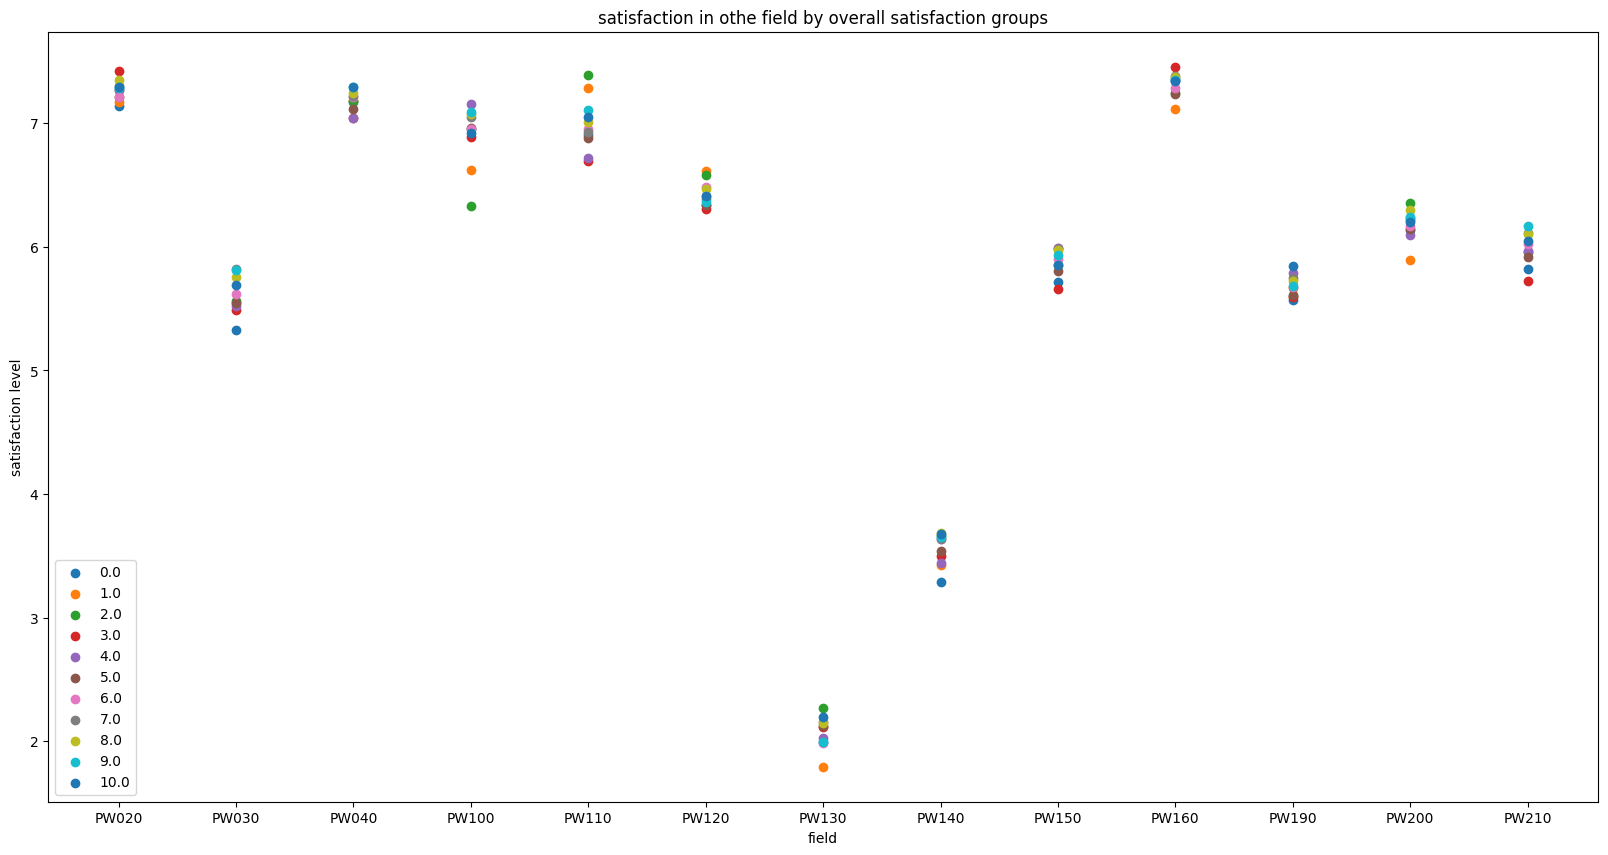

In [283]:
import matplotlib.pyplot as plt

plt.figure(figsize=[20,10])
for row in grouped_10.index:
    plt.scatter(x = grouped_10.columns, y=grouped_10.loc[row,:], label=row)
    plt.legend()

plt.title('satisfaction in othe field by overall satisfaction groups')    
plt.ylabel('satisfaction level')
plt.xlabel('field')

Text(0.5, 0, 'field')

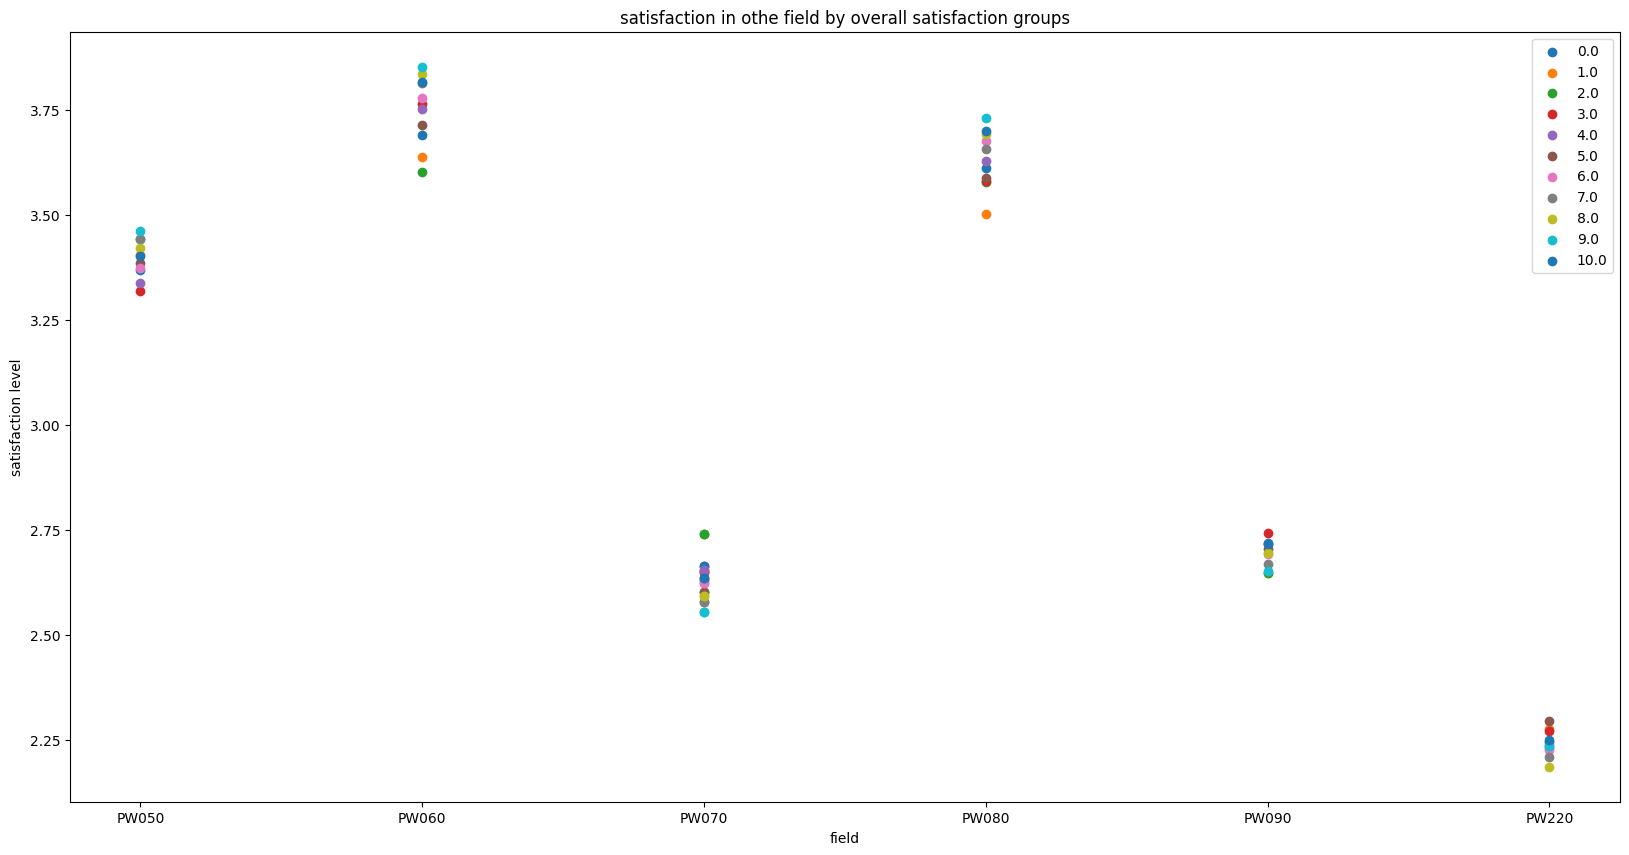

In [284]:
plt.figure(figsize=[20,10])
for row in grouped_5.index:
    plt.scatter(x = grouped_5.columns, y=grouped_5.loc[row,:], label=row)
    plt.legend()

plt.title('satisfaction in othe field by overall satisfaction groups')    
plt.ylabel('satisfaction level')
plt.xlabel('field')

In [288]:
df['PW220'].value_counts()

PW220
2.0    11808
3.0     5720
1.0     4800
4.0     2491
Name: count, dtype: int64

Text(0.5, 0, 'field')

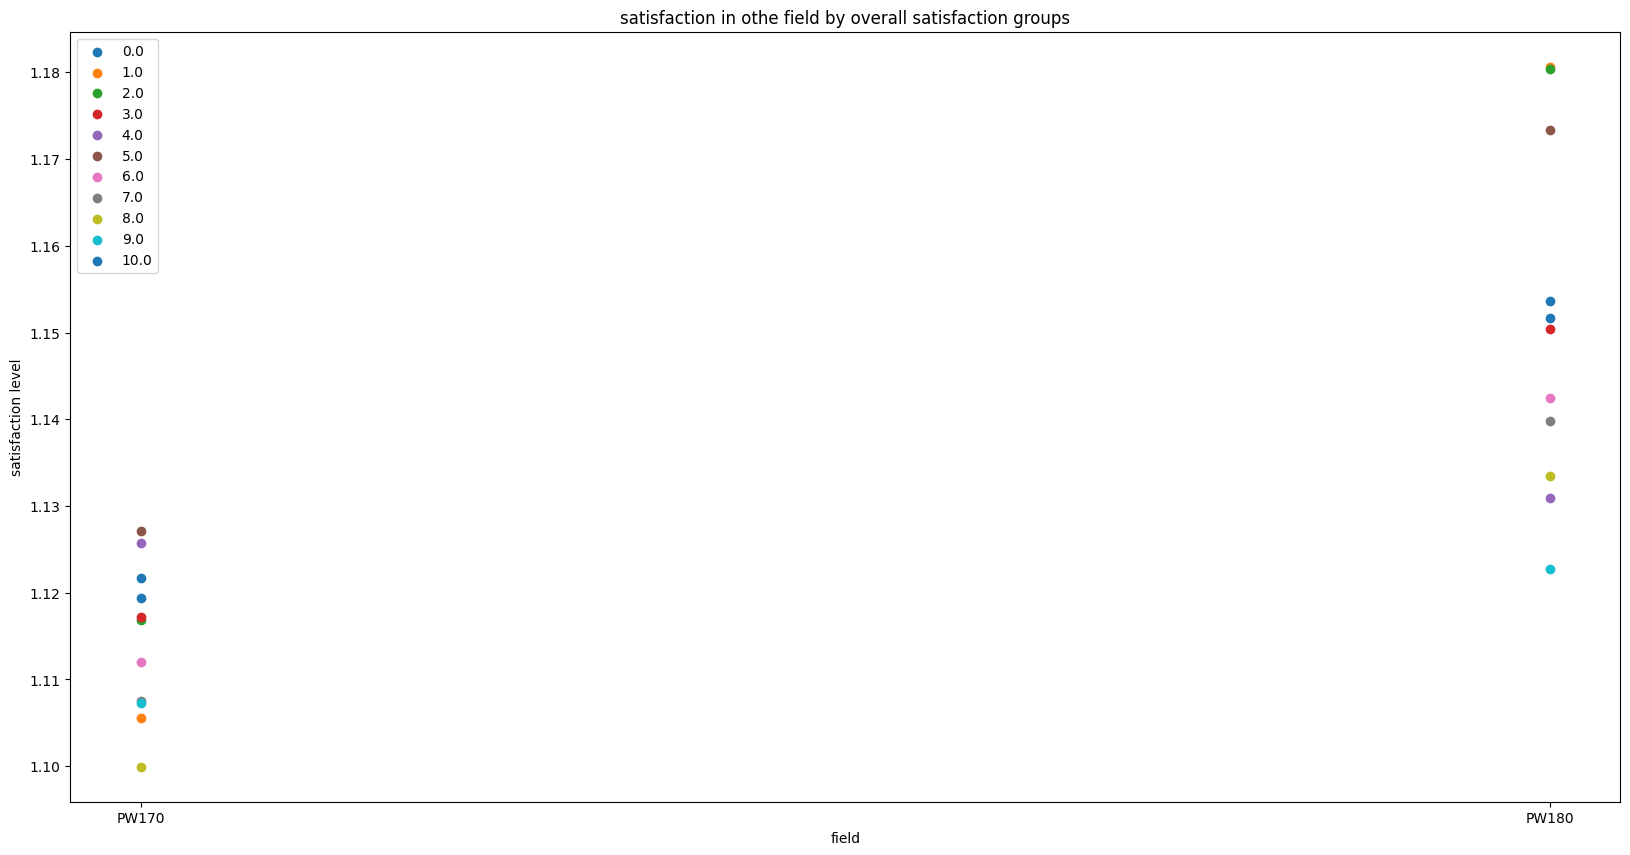

In [286]:
plt.figure(figsize=[20,10])
for row in grouped_2.index:
    plt.scatter(x = grouped_2.columns, y=grouped_2.loc[row,:], label=row)
    plt.legend()

plt.title('satisfaction in othe field by overall satisfaction groups')    
plt.ylabel('satisfaction level')
plt.xlabel('field')

In [287]:
df[['PW010','PW170']].corr()
df['PW170'].value_counts()

PW170
1.0    21884
2.0     2891
Name: count, dtype: int64

In [326]:
df['PY200G'].value_counts()
df['PY200G']=df['PY200G'].replace({1630:np.nan})

In [327]:
df['PY200G'].value_counts()

PY200G
307.0     628
502.0     593
639.0     574
373.0     530
438.0     424
         ... 
1478.0      1
563.0       1
808.0       1
1215.0      1
685.0       1
Name: count, Length: 1629, dtype: int64

<Axes: title={'center': 'PY200G'}, xlabel='PW100'>

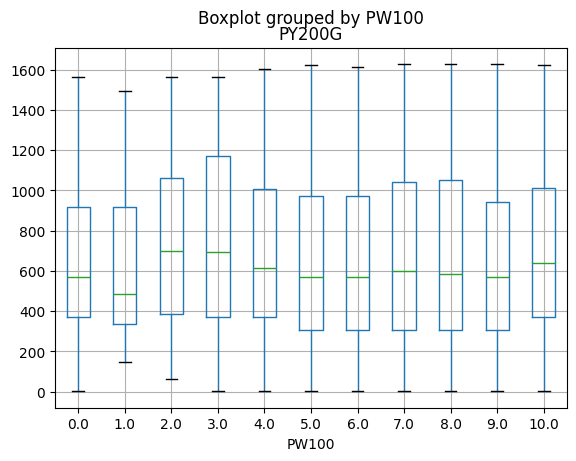

In [328]:
df[['PY200G', 'PW100']].corr()
df.boxplot(column='PY200G',by='PW100')
# df.bar(column='PY200G',by='PW100')
# plt.boxplot(x='PY200G', data=df, )
# two = df[df['PW100'] == 2]['PY200G']
# plt.hist(x=df[df['PW100'] == 2]['PY200G'])
# for x in grouped_employment:
#     print(x)
# plt.boxplot(grouped_employment.groups)

130


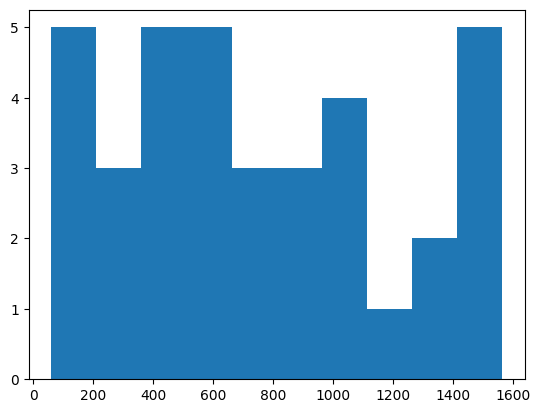

In [330]:
two = pd.DataFrame(df[df['PW100'] == 2]['PY200G'])
two
plt.hist(x=two)
print(len(two))

In [321]:
two.value_counts()

PY200G
1630      94
639        3
1492       3
1064       2
171        1
60         1
120        1
78         1
307        1
373        1
438        1
391        1
502        1
233        1
271        1
128        1
571        1
525        1
510        1
758        1
918        1
779        1
802        1
894        1
1050       1
1014       1
934        1
1174       1
1360       1
1347       1
1515       1
1563       1
Name: count, dtype: int64

In [306]:
grouped_employment

,0,1
0,0.0,72 1630 332 1630 346 571 355 ...
1,1.0,473 1630 905 1630 1323 571 1737...
2,2.0,30 1515 113 779 202 1630 564 ...
3,3.0,289 1630 618 1492 1090 1630 1180...
4,4.0,37 1630 127 1630 212 1630 220 ...
5,5.0,69 502 83 1630 92 1630 93 ...
6,6.0,10 1630 60 1630 64 1630 71 ...
7,7.0,0 422 1 1630 11 802 19 ...
8,8.0,7 303 13 1630 25 1630 28 ...
9,9.0,8 1630 77 1630 80 1064 114 ...
